In [1]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity"
ds=get_dataset(dataset_name="fig5_24_at25_bad_intsteps")

In [17]:
thesis_1 = {"priors":["bad"],"slices":[[6],[12],[18],[24]]};thesis_1["data"]=ds.loc[ds["prior"].isin(thesis_1["priors"])]

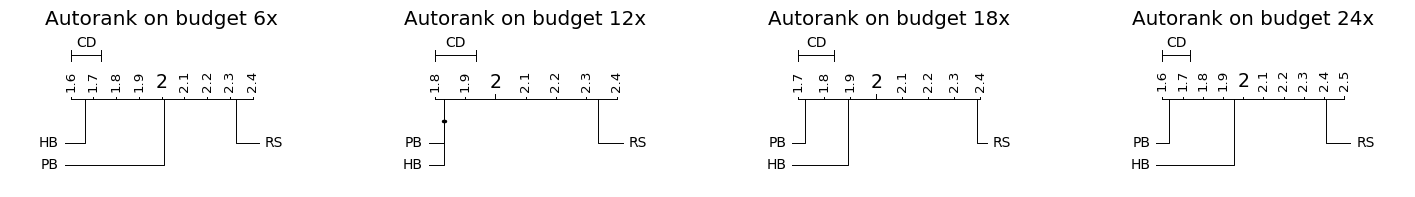

In [34]:
# First plot: Autorank on data AT 5, AT 10, AT 15, AT 20x budget given the raw value
plot_1=bt_plot(slices=thesis_1["slices"],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_1.change_row(0,None,globality=False,loss="value",titles=["Autorank on budget 6x","Autorank on budget 12x","Autorank on budget 18x","Autorank on budget 24x"])
plot_1.show()

boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates


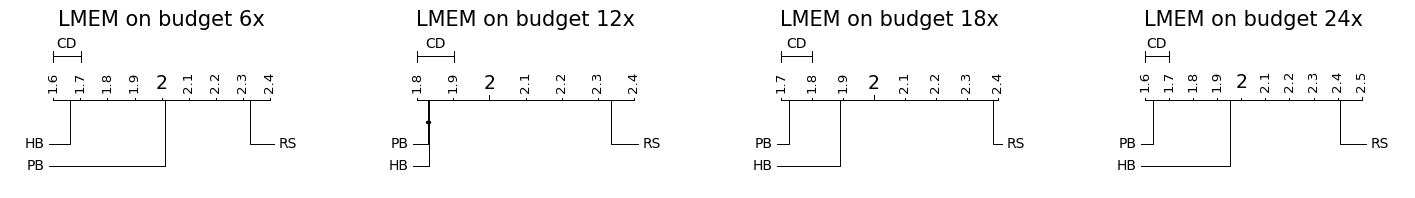

In [35]:
# Second plot: LMEM on same data
plot_2=bt_plot(slices=thesis_1["slices"],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_2.change_row(0,f"{algorithm}",globality=False,loss="rel_rank",titles=["LMEM on budget 6x","LMEM on budget 12x","LMEM on budget 18x","LMEM on budget 24x"])
plot_2.show()


P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


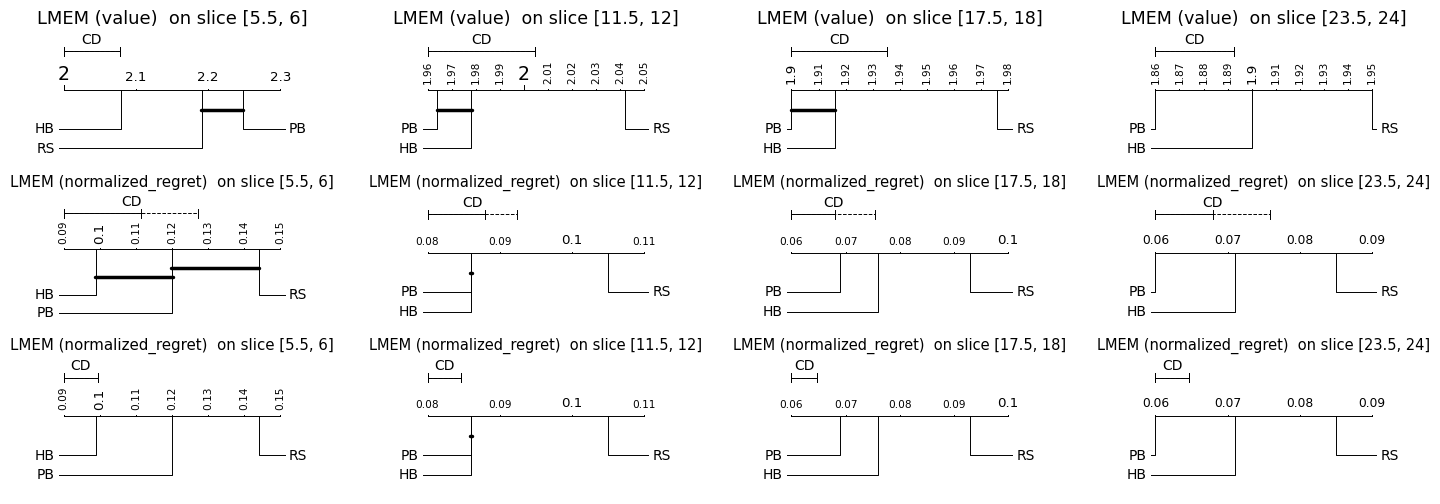

In [41]:
# Third plot: LMEM on same data but with other effects and metrics
plot_3=bt_plot(slices=thesis_1["slices"],rows=3,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_3.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="value")
plot_3.change_row(1,f"{algorithm}+({algorithm}|{benchmark})",globality=False,loss="normalized_regret")
plot_3.change_row(2,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret")
plot_3.show()


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


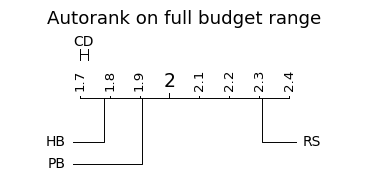

In [45]:
# Fourth plot: Autorank on data 0-24
plot_4=bt_plot(slices=[[0,24]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_4.change_row(0,None,globality=False,loss="value",titles=["Autorank on full budget range"])
plot_4.show()


P-values adjusted by tukey method for family of 3 estimates


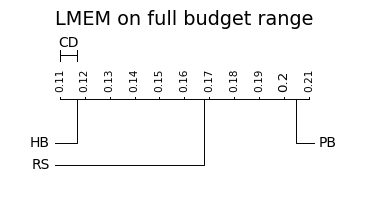

In [67]:
# Fourth plot: Autorank on data 0-24
plot_5=bt_plot(slices=[[0,12]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_5.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=["LMEM on full budget range"])
plot_5.show()


P-values adjusted by tukey method for family of 3 estimates


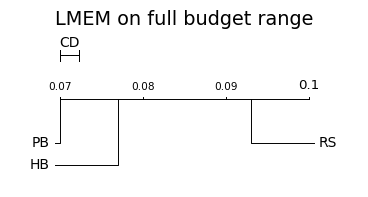

In [72]:
# Fifth plot: LMEM on data 0-24, model with budget as effect, normalized regret
plot_5=bt_plot(slices=[[12,24]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_5.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=["LMEM on full budget range"])
plot_5.show()

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


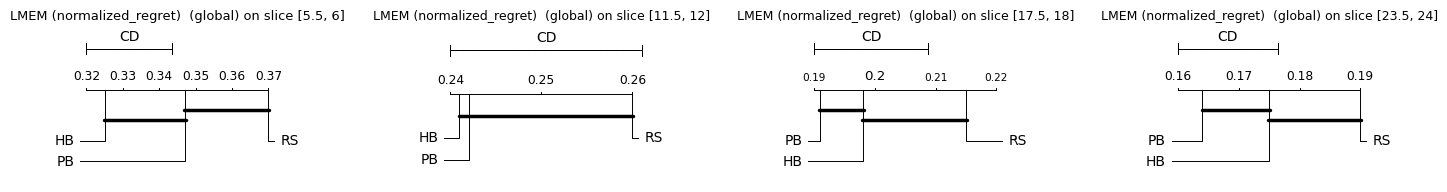

In [19]:
# Sixth plot: LMEM trained on 0-24, with slices 0-6, 6-12, 12-18, 18-24
plot_6=bt_plot(slices=[[6],[12],[18],[24]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_6.change_row(0,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret")
plot_6.show()